## Von miesis plane stress-projected plasticity model with linear isotropic hardening<font color='black'></font> 





### The von Mises yield criterion (also known as the maximum distortion energy criterion) suggests that yielding of a ductile material begins when the second deviatoric stress invariant  J2 reaches a critical value ( Material fails when distortion energy reaches that of tension test)<font color='black'></font> 






![title](Von_mesis_yield1.jpg)

### The plane stress algorithm can be summarised in the following manner  <font color='black'></font> 

where the variable GAMMA is essentially the lagrange multiplier obtained from applying lagrange optimization on the principle of maximum dissipation constrained by the yield function


1- Elasto plastic strain split

$\hspace{9cm}$$\dot{\varepsilon} = \dot{\varepsilon}^e +\dot{\varepsilon}^p$



$\hspace{5cm}$$\varepsilon \equiv\left[\varepsilon_{11} \varepsilon_{22} 2 \varepsilon_{12}\right]^{T} , \varepsilon^{e} \equiv\left[\varepsilon_{11}^{e} \varepsilon_{22}^{c} 2 \varepsilon_{12}^{e}\right]^{T}, \varepsilon^{p} \equiv\left[\varepsilon_{11}^{P} \varepsilon_{22}^{P} 2 \varepsilon_{12}^{P}\right]^{T}$

2- Elastic law

$\hspace{9cm}\sigma=\mathbf{D}^{e} \varepsilon^{e}$

$\hspace{5cm}\boldsymbol{\sigma} \equiv\left[\sigma_{11} \sigma_{22} \sigma_{12}\right]^{T},\mathbf{D}^{e} \equiv \frac{E}{1-\nu^{2}}\left[\begin{array}{ccc}{1} & {\nu} & {0} \\ {\nu} & {1} & {0} \\ {0} & {0} & {\frac{1-\nu}{2}}\end{array}\right] $

3- yield function definition

$\hspace{5cm}\Phi=\frac{1}{2} \sigma^{T} \mathbf{P} \sigma-\frac{1}{3} \sigma_{y}^{2}\left(\varepsilon^{p}\right)$
,$\mathbf{P} \equiv \frac{1}{3}\left[\begin{array}{rrr}{2} & {-1} & {0} \\ {-1} & {2} & {0} \\ {0} & {0} & {6}\end{array}\right]$

4- Plastic flow rule

$\hspace{9cm}\dot{\varepsilon}^{P}=\dot{\gamma} \frac{\partial \Phi}{\partial \sigma}=\dot{\gamma} \mathbf{P} \sigma$

5- Hardening variable evolotion

$\hspace{9cm}\dot{\overline{\varepsilon}}^{P}=\dot{\gamma} \sqrt{\frac{2}{3} \sigma^{T} \mathbf{P} \sigma}$

6- Loading undloading criterion

$\hspace{9cm}\dot{\gamma} \geq 0, \quad \Phi \leq 0, \quad \dot{\gamma} \Phi=0$

### The prosedure is split into two states Elatic/ElastoPlastic. for that reason we need to implement what is known as the Elastic predector / Plastic corrector return mapping algorithm   <font color='black'></font> 
![title](elastic_predector.jpg)

1- The trial strain state at a pseudo time (n+1) after applying the strain increment is assumed to be purly elastic.

2- The trial stress state (n+1) is calculated based on the trial elastic strain state (n+1).

3- Yield function is calculated to determine the state of loading (Elastic or ElastoPlastic). 

4- For Elastic loading state the values at (n+1)=(n+1)trial. 

5- For ElastoPlastic loading state a return mapping is applied and in consequence the yield domain, stress state,elastic strain    state, and plastic strain state is updated depending on the plastic multiplier GAMMA.  
   

### Which can be summarised in the following manner 

1 - Elastic predictor. Given the in-plane incremental strains, ∆ε, and the state variables at
tn, evaluate the elastic trial state

$\hspace{9cm}\varepsilon_{n+1}^{e \text { trial }} :=\varepsilon_{n}^{e}+\Delta \varepsilon$

$\hspace{9cm}\overline{\varepsilon}_{n+1}^{p \text { trial }} :=\overline{\varepsilon}_{n}^{p}$

$\hspace{9cm}\sigma_{n+1}^{\text { trial }} :=\mathbf{D}^{e} \varepsilon_{n+1}^{e \text { trial }}$

2 - Check plastic admissibility

$\hspace{6cm}a_{1} :=\left(\sigma_{11}^{\text { trial }}+\sigma_{22}^{\text { trial }}\right)^{2} ; \quad a_{2} :=\left(\sigma_{22}^{\text { trial }}-\sigma_{11}^{\text { trial }}\right)^{2} ; \quad a_{3} :=\left(\sigma_{12}^{\text { trial }}\right)^{2}$

$\hspace{6cm}\xi^{\text { trial }} :=\frac{1}{6} a_{1}+\frac{1}{2} a_{2}+2 a_{3}$

$\hspace{6cm}$IF $\Phi^{\text { trial }} :=\frac{1}{2} \xi^{\text { trial }}-\frac{1}{3} \sigma_{y}^{2}\left(\varepsilon_{n+1}^{p \text { trinl }}\right) \leq 0$

$\hspace{6cm}$THEN set $(\cdot)_{n+1} :=(\cdot)_{n+1}^{\text { trinl }}$ and EXIT

3- Return mapping.Solve the non linear equation

$\hspace{9cm}$$\tilde{\Phi}(\Delta \gamma)=0$

$\hspace{1cm}$ for ∆γ using the Newton–Raphson method and update the state
variables

$\hspace{8cm}\boldsymbol{\sigma}_{n+1} :=\mathbf{A}(\Delta \gamma) \boldsymbol{\sigma}_{n+1}^{\mathrm{trial}}$

$\hspace{8cm}\varepsilon_{n+1}^{e} :=\mathbf{C} \sigma_{n+1}$

$\hspace{8cm}\overline{\varepsilon}_{n+1}^{p} :=\overline{\varepsilon}_{n}^{p}+\Delta \gamma \sqrt{\frac{2}{3} \xi(\Delta \gamma)}$

###  The newton raphson algorithm  for solving the non linear  problem can be summarised  as follows  

1 - Set initial guess for ∆γ

$\hspace{9cm}\Delta \gamma :=0$
   
  $\hspace{0.4cm}$ and corresponding residual, Φ

$\hspace{8cm}\xi :=\frac{1}{6}\left(\sigma_{11}^{\text { trial }}+\sigma_{22}^{\text { trial }}\right)^{2}+\frac{1}{2}\left(\sigma_{22}^{\text { trial }}-\sigma_{11}^{\text { trial }}\right)^{2}+2\left(\sigma_{12}^{\text { trial }}\right)^{2}$

$\hspace{8cm}\tilde{\Phi} :=\frac{1}{2} \xi-\frac{1}{3} \sigma_{y}^{2}\left(\overline{\varepsilon}_{n}^{p}\right)$

2 - Perform Newton–Raphson iteration

$\hspace{8cm}H :=\left.\frac{\mathrm{d} \sigma_{y}}{\mathrm{d} \overline{\varepsilon}^{p}}\right|_{\overline{\varepsilon}_{n}^{p}+\Delta \gamma \sqrt{2 \xi / 3}}$

$\hspace{8cm}\xi^{\prime} :=-\frac{\left(\sigma_{11}^{\text { trial }}+\sigma_{22}^{\text { trial }}\right)^{2}}{9\left[1+\frac{E \Delta \gamma}{3(1-\nu)}\right]^{3}} \frac{E}{(1-\nu)}-2 G \frac{\left(\sigma_{22}^{\text { trial }}-\sigma_{11}^{\text { trial }}\right)^{2}+4\left(\sigma_{12}^{\text { trial }}\right)^{2}}{(1+2 G \Delta \gamma)^{3}}$

$\hspace{8cm}\overline{H} :=2 \sigma_{y}\left(\overline{\varepsilon}_{n}^{p}+\Delta \gamma \sqrt{\frac{2}{3} \xi}\right) H \sqrt{\frac{2}{3}}\left(\sqrt{\xi}+\frac{\Delta \gamma \xi^{\prime}}{2 \sqrt{\xi}}\right)$

$\hspace{8cm}\tilde{\Phi}^{\prime} :=\frac{1}{2} \xi^{\prime}-\frac{1}{3} \overline{H}$

$\hspace{8cm}\Delta \gamma :=\Delta \gamma-\frac{\tilde{\Phi}}{\tilde{\Phi}^{\prime}}$

3- Check for convergence

$\hspace{8cm}\xi :=\frac{\left(\sigma_{11}^{\text { trial }}+\sigma_{22}^{\text { trial }}\right)^{2}}{6\left[1+\frac{E \Delta \gamma}{3(1-\nu)}\right]^{2}}+\frac{\frac{1}{2}\left(\sigma_{22}^{\text { trial }}-\sigma_{11}^{\text { trial }}\right)^{2}+2\left(\sigma_{12}^{\text { trial }}\right)^{2}}{(1+2 G \Delta \gamma)^{2}}$

$\hspace{8cm}\tilde{\Phi} :=\frac{1}{2} \xi-\frac{1}{3} \sigma_{y}^{2}\left(\overline{\varepsilon}_{n}^{p}+\Delta \gamma \sqrt{\frac{2}{3} \xi}\right)$

$\hspace{8cm}$IF $|\tilde{\Phi}| \leq \epsilon_{\text { tol }}$ Then return to elastic predector/return mapping

In [22]:
# import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
# initilize model variables
def initilize ():
    global STRAINE
    global STRAINEE
    global EET 
    global EPLAST
    global EPLASTN
    global STRESST
    global STRESS
    global DGAMA
    global STRAINPBARN
    global strain
    global stress
    global B1
    global B2
    

    STRAINE     = np.array([0., 0, 0, 0])   # Elastic strain tensor
    STRAINEE    = np.array([0., 0, 0, 0])   # Elastic strain tensor
    EET         = np.array([0., 0, 0])      # Trial deviatoric strain tensor
    EPLAST      = np.array([0., 0, 0])      # Incremental plastic strain tensor
    EPLASTN     = np.array([0., 0, 0])      # Accumulated plastic strain tensor at load step N
    STRESST     = np.array([0., 0, 0])      # Trial stress tensor
    STRESS      = np.array([0., 0, 0])      # Stress tensor
    DGAMA       = 0.                        # Plastic strain multiplier
    STRAINPBARN = 0.                        # Equivalent accumulated plastic strain
    strain      = np.array([0,0,0])         # initilize stress tensor for post processing    
    stress      = np.array([0,0,0])         # initilize strain tensor for post processing
    B1          =1                          # initilize newton raphson variable
    B2          =1                          # initilize newton raphson variable

In [24]:
# define model parameters
def parameters (youngs_modulus,poissons_ratio,
                hardening_modulus,initial_yield_stress,
                maximum_strain11,maximum_strain22,maximum_strain12,global_strain_increment,tolerance):
    
    global YOUNG   # Youngs moduli Mpa
    global POISS   # Poisson ratio
    global HARDM   #Isotropic hardening moduli Mpa
    global Y0      # Initial yeild stress Mpa
    global GMODU   # Shear moduli
    global BULK    # Bulk moduli
    global FMODU
    global SQR2D3  # constant
    global tol     # Error tolerance for newton raphson and yield criteria
    global STRMAX1 # maximum strain value in the principle diriction 11
    global STRMAX2 # maximum strain value in the principle diriction 22
    global STRMAX3 # maximum shear strain value in the diriction 12
    global DST1    # strain increment in the principle diriction 11
    global DST2    # strain increment in the principle diriction 22
    global DST3    # shear strain increment in the diriction 12
    global c       # Counter for newton raphson iteration
    global M       # Number of for loop itiration till the strain increment reaches maximum value
    
    YOUNG  = youngs_modulus
    POISS  = poissons_ratio
    HARDM  = hardening_modulus
    Y0     = initial_yield_stress
    GMODU  = YOUNG / (2 * (1 + POISS))
    BULK   = YOUNG / (3 * (1 - (2 * POISS)))
    FMODU  = (YOUNG) / (3. * (1 - POISS))
    SQR2D3 = np.sqrt(2./3)
    tol    = tolerance
    STRMAX1= maximum_strain11
    STRMAX2= maximum_strain22
    STRMAX3= maximum_strain12
    c      = 0
    if STRMAX1 !=0 :
        DST1   = np.sign(STRMAX1)*(global_strain_increment)
        M      = abs(int(np.ceil(STRMAX1 / DST1)))
        DST2   = STRMAX2/M
        DST3   = STRMAX3/M
    elif STRMAX2 !=0 :
        DST1   = 0
        DST2   = np.sign(STRMAX2)*global_strain_increment
        M      = abs(int(np.ceil(STRMAX2 / DST2)))
        DST3   = np.sign(STRMAX3)*STRMAX3/M
    else:
        DST1   = 0
        DST2   = 0
        DST3   = np.sign(STRMAX3)*global_strain_increment
        M      = abs(int(np.ceil(STRMAX3 / DST3)))
        
    

In [25]:
# 1 - Elastic predictor. Given the in-plane incremental strains, ∆ε, and the state variables at tn, evaluate the elastic trial state

def Trial_Elastic_Stress(STRAINEE):
   # Volumetric strain
    FACTOR = 2*GMODU / (BULK + ((4.*GMODU)/3))
    EEV = (STRAINEE[0] + STRAINEE[1]) * FACTOR  # volumetric strain

    # Trial elastic deviatoric strain
    EEVD3 = EEV / 3.
    EET[0] = STRAINEE[0] - EEVD3
    EET[1] = STRAINEE[1] - EEVD3

    # Convert engineering shear component into physical component

    EET[2] = STRAINEE[2] * 0.5

    # Trial elastic stress components

    PT = BULK * EEV
    STRESST[0] = (2*GMODU * EET[0]) + PT
    STRESST[1] = (2*GMODU * EET[1]) + PT
    STRESST[2] = (2*GMODU * EET[2])
    return(STRESST)

In [26]:
# 2 - Check plastic admissibility

def Yield_Function(STRESST,STRAINPBARN):
    
    A1 = (STRESST[0] + STRESST[1]) * (STRESST[0] + STRESST[1])
    A2 = (STRESST[1] - STRESST[0]) * (STRESST[1] - STRESST[0])
    A3 = (STRESST[2] * STRESST[2])
    XI = (1./6 * A1) + (0.5 * A2) + (2 * A3)
    SIGMAY = (Y0 + (HARDM * STRAINPBARN))

    # Yield function

    PHI = (0.5 * XI) - (1./3 * SIGMAY * SIGMAY)
    
    return(A1,A2,A3,SIGMAY,PHI,XI)

In [27]:
# equations 2 in newton raphson's algorithm


def Compute_Residual_Direvatives(A1,A2,A3,B1,B2,SIGMAY,XI):


    DXI = (-A1 * FMODU / (3. * B1 * B1 * B1)) - 2.*GMODU * (A2 + 4 * A3) / (B2 * B2 * B2)
    HBAR = 2. * SIGMAY * HARDM * (np.sqrt(2./3)) * ((np.sqrt(XI)) + ((DGAMA * DXI) / (2 * (np.sqrt(XI)))))
    DPHI = ((0.5) * DXI) - (1./3 * HBAR)
    
    return(DXI,HBAR,DPHI)

In [28]:
# equations 3 in newton raphson's algorithm

def Compute_New_Residual(A1,A2,A3,B1,B2,SIGMAY,XI,DGAMA,STRAINPBARN):
    
    B1 = 1. + (FMODU * DGAMA)
    B2 = 1. + (2.*GMODU * DGAMA)
    XI = (1./6) * A1 / (B1 * B1) + ((0.5 * A2) + (2 * A3)) / (B2 * B2)
    SQRTXI = np.sqrt(XI)
    EPBAR = STRAINPBARN + (DGAMA *(np.sqrt(2./3)  * SQRTXI))
    SIGMAY = (Y0 + (HARDM * EPBAR))
    PHI = (0.5 * XI) - ((1./3) * SIGMAY * SIGMAY)
    
    return(B1,B2,XI,EPBAR,SIGMAY,PHI)

In [29]:
# equations 3 in the elastic-predector/plastic-corrector return algorithm

def Plastic_Step_Stress_Update(DGAMA,STRESST):
    ASTAR1=(3*(1-POISS))/((3*(1-POISS))+(YOUNG*DGAMA))
    ASTAR2=1/(1+((2.*GMODU)*DGAMA))
    A11=(0.5)*(ASTAR1+ASTAR2)
    A22=A11
    A12=(0.5)*(ASTAR1-ASTAR2)
    A21=A12
    A33=ASTAR2
    if DST1 == 0:
        STRESS[0] = 0
    else:
        STRESS[0] = A11*STRESST[0]+A12*STRESST[1]
    if DST2 == 0:
        STRESS[1] = 0
    else:
        STRESS[1] = A21*STRESST[0]+A22*STRESST[1]
    STRESS[2] = A33*STRESST[2]
        
    return(STRESS)
    

In [30]:
# equation 1,3 in the elastic-predector/plastic-corrector return algorithm

def Elastic_Strain_update(STRESS):

    FACTG=1/(2.*GMODU)
    P=(1./3)*(STRESS[0]+STRESS[1])
    EEV=P/BULK
    EEVD3=(1./3)*EEV
    STRAINE[0]= (FACTG*(((2./3)*STRESS[0])-((1./3)*STRESS[1])))+EEVD3
    STRAINE[1]= (FACTG*(((2./3)*STRESS[1])-((1./3)*STRESS[0])))+EEVD3
    STRAINE[2]=  (FACTG*STRESS[2]*2.)
    STRAINE[3]=  -POISS/((1.-POISS)*(STRAINE[0]+STRAINE[1]))
    
    return(STRAINE)

In [31]:
def Plastic_Strain_Increment_Update(STRESS):

    EPLAST = [((2. / 3) * STRESS[0] - (STRESS[1] / 3.)),(((2. / 3) * STRESS[1]) - (STRESS[0] / 3.)),((6./3) * STRESS[2])]
    EPLAST = [x * DGAMA for x in EPLAST]
    
    return  (EPLAST)

In [32]:
initilize()



parameters(200000,0.2,1200,200,0.03,0.04,0.02,0.00001,1*10**-11)


for J in range(0, M):
    
    if J == 0:
        c = 0
        STRAINEE[0] = 0.
        STRAINEE[1] = 0.
        STRAINEE[2] = 0.
    elif STRMAX1 !=0 and STRMAX2 !=0:
        c = 0
        
        STRAINEE[0] = STRAINE[0] +DST1           
        STRAINEE[1] = STRAINE[1] +DST2    
        STRAINEE[2] = STRAINE[2] +DST3
        
    elif STRMAX1 !=0 and STRMAX2 ==0 :
        c = 0
        STRAINEE[0] = STRAINE[0] +DST1           
        STRAINEE[1] = STRAINE[1] -DST1*POISS    
        STRAINEE[2] = STRAINE[2] +DST3
    else:
        c = 0
        STRAINEE[0] = STRAINE[0] - (DST2 *POISS)         
        STRAINEE[1] = STRAINE[1] + (DST2)    
        STRAINEE[2] = STRAINE[2] + (DST3)

    #########################################################
    ##    Elastic predictor: Compute elastic trial state   ##
    #########################################################
    
    STRESST = Trial_Elastic_Stress(STRAINEE)

    # Compute yield function value at trial state

    (A1,A2,A3,SIGMAY,PHI,XI)= Yield_Function(STRESST,STRAINPBARN)

    # Check for plastic loading

    if PHI / SIGMAY > tol:

     ####################################################################### 
     ## Plastic step: Apply return mapping - use Newton-Raphson algorithm ##
     ##    To solve the plane stress-projected return mapping             ##
     #######################################################################
        
    # Update accumulated plastic strain
    
        EPBAR = STRAINPBARN     
        

        while c < 10:
            c = c + 1

        # Compute residual derivative
        
            (DXI,HBAR,DPHI)=Compute_Residual_Direvatives(A1,A2,A3,B1,B2,SIGMAY,XI)

        # Compute Newton-Raphson increment and update equation variable DGAMA

            DGAMA = DGAMA - (PHI / DPHI)

        # Compute new residual (yeild function value)
        
            (B1,B2,XI,EPBAR,SIGMAY,PHI)= Compute_New_Residual(A1,A2,A3,B1,B2,SIGMAY,XI,DGAMA,STRAINPBARN)
        # Check convergance
        
            RESNOR = np.abs(PHI / SIGMAY)


            if RESNOR < tol:

    #  Update accumulated plastic strain
                STRAINPBARN = EPBAR

    #   update stress components: sigma := A sigma^trial
                STRESS = Plastic_Step_Stress_Update(DGAMA,STRESST)
    #compute corresponding elastic (engineering) strain components
                STRAINE = Elastic_Strain_update(STRESS)
             
                break

    else:

        STRESS[0] = STRESST[0]
        STRESS[1] = STRESST[1]
        STRESS[2] = STRESST[2]

        STRAINE[0] = STRAINEE[0]
        STRAINE[1] = STRAINEE[1]
        STRAINE[2] = STRAINEE[2]
        STRAINE[3]= -POISS/((1-POISS)*(STRAINEE[0]+STRAINEE[1]));




#  compute the plastic strain increment

    EPLAST = Plastic_Strain_Increment_Update(STRESS)

#  accumulated plastic strain(EPN + 1)

    EPLASTN = EPLASTN + EPLAST


#  Elastic strain(EN + 1)

    STRAINEN = STRAINE

# total strain

# post processing for the stress and the strain

    strtmp=np.array([EPLASTN[0]+STRAINEN[0], EPLASTN[1]+STRAINEN[1], EPLASTN[2]+STRAINEN[2]])
    strain=np.vstack((strain,strtmp))
    stress=np.vstack((stress,STRESS))

#strain_data = np.vstack((strain_data,strain))
#stress_data = np.vstack((stress_data,stress))
     


E:\anaconda\envs\ztdl\lib\site-packages\ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in double_scalars


In [33]:
print(len(strain),len(stress))


3001 3001


In [34]:
strain_data =np.array([0,0,0])
stress_data =np.array([0,0,0])

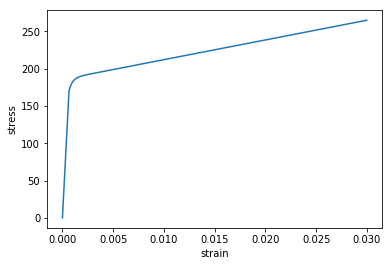

<Figure size 432x288 with 0 Axes>

In [35]:
plt.clf()
plt.plot(strain[:,0],stress[:,0])
plt.xlabel('strain')
plt.ylabel('stress')
plt.show()
plt.tight_layout()


In [36]:
#np.savetxt("hook_stress.csv", stress, delimiter=",")
#np.savetxt("hook_strain.csv", strain, delimiter=",")
#np.savetxt("stress_data1.csv", stress_data, delimiter=",")
#np.savetxt("strain_data1.csv", strain_data, delimiter=",")

###  Code varefication attempt 1 using a single finite element in abaqus   <font color='black'></font> 
problem description:

1- A single quadratic element was chosen with a length and width of 1mm (so the corresponding --     
   displacement field is the same as the strain field)
   
2- The material parameters were chosen as follows  
   a- for the elastic zone -young's modulus = 200 Gpa  -Poisson's ratio = 0.2
   
   b- for the plastic zone -the initial yeild stress = 200 Mpa and -the Hardeing modulus =1200 Mpa
       which corresponds to the data point (270 yeild strerss 0.05833 plastic strain).
       
3- A symetric boundary condition was applied on the left and lower edge.

4- A prescribed strain of 0.05 was applied on the upper edge as a loading condition. 

![title](element.jpg)

###  after the analysis is complete a stress strain plot is generated (in the direction of loading 0.05 strain )  <font color='black'></font> 


![title](AbaqusResult1.jpg)

## Visualization

In [37]:
Stress_UD_code          = pd.read_csv('stress_uniaxial_U(0.05).csv')
Strain_UD_code          = pd.read_csv('strain_uniaxial_U(0.05).csv')
Stress_Strain_UD_abaqus = pd.read_csv('../../abaqus/1-Uniaxial-loading-plane-stress/Uniaxial-stress-strain-output(U2=0.05).csv',delimiter=";")
Stress_Strain_UD_abaqus = Stress_Strain_UD_abaqus.drop(['Unnamed: 2'],axis=1)
Stress_Strain_UD_code   = pd.concat([Strain_UD_code,Stress_UD_code],axis=1)


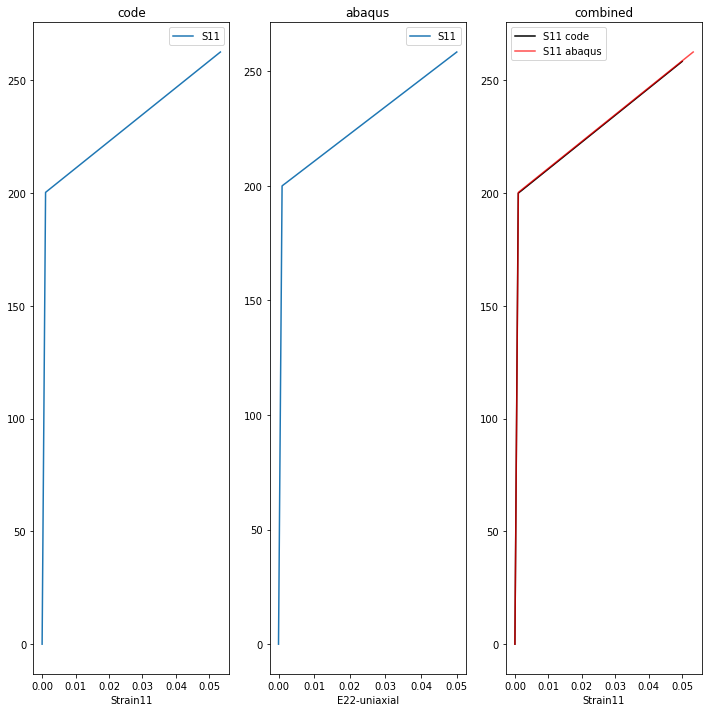

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

Stress_Strain_UD_code.plot  (ax=ax[0]  , x='Strain11'    , y='Stress11'    , title ='code'    )
Stress_Strain_UD_abaqus.plot(ax=ax[1]  , x='E22-uniaxial', y='S22-uniaxial', title ='abaqus'  )
Stress_Strain_UD_abaqus.plot(ax=ax[2]  , x='E22-uniaxial', y='S22-uniaxial', title ='combined',alpha=1,color='black')
Stress_Strain_UD_code.plot  (ax=ax[2]  , x='Strain11'    , y='Stress11'    , title ='combined',alpha=0.7, color='red')
ax[0].legend(['S11'])  
ax[1].legend(['S11'])
ax[2].legend(['S11 code','S11 abaqus'])

plt.tight_layout()

###  Code varefication attempt 2 using a single finite element in abaqus   <font color='black'></font> 
problem description:

1- A single quadratic element was chosen with a length and width of 1mm (so the corresponding --     
   displacement field is the same as the strain field)
   
2- The material parameters were chosen as follows  
   a- for the elastic zone -young's modulus = 200 Gpa -Poisson's ratio= 0.2
   
   b- for the plastic zone -the initial yeild stress = 200 Mpa and -the    
      Hardeing modulus =1200 Mpa which corresponds to the data point (270 
      yeild strerss 0.05833 plastic strain).
      
3- A symetric boundary condition was applied on the left and lower edge.

4- A prescribed strain of 0.05 was applied on the upper edge and a 0.01  
   strain is prescribed on the right edge as a loading condition. 

###  after the analysis is complete a stress strain plot is generated (in the direction of loading 0.01, and 0.05 strain )


![title](abaqus_bi_s11.jpg)

![title](abaqus_bi_s22.jpg)

## Visualization

In [39]:
Stress_bi_code          = pd.read_csv('stress_biaxial_U(0.01_0.05).csv')
Strain_bi_code          = pd.read_csv('strain_biaxial_U(0.01_0.05).csv')
Stress_Strain_bi_abaqus = pd.read_csv('../../abaqus/2-biaxial-loading-plane-stress/biaxial-stress-strain-output(U1=0.01,U2=0.05).csv',delimiter=";")
Stress_Strain_bi_code   = pd.concat([Strain_bi_code,Stress_bi_code],axis=1)


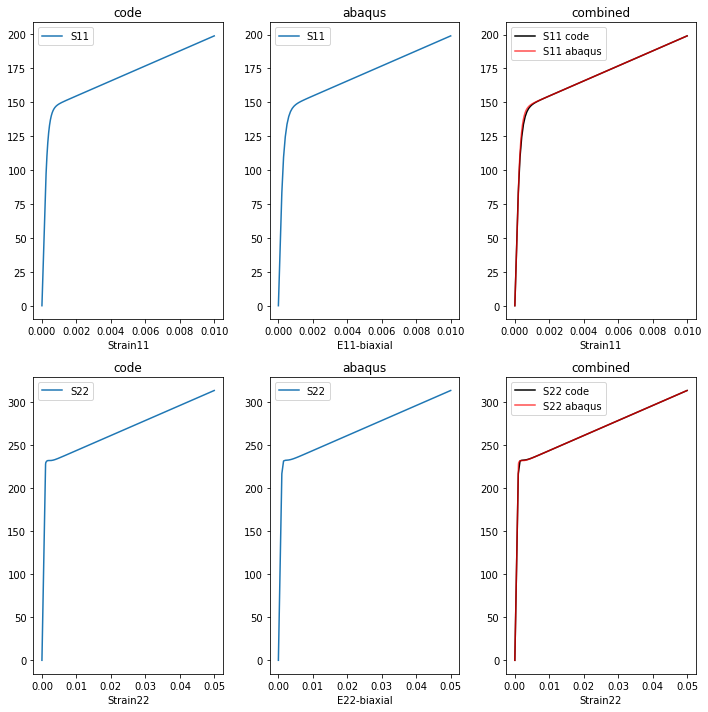

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

Stress_Strain_bi_code.plot  (ax=ax[0][0]  , x='Strain11'    , y='Stress11'    , title ='code'   )
Stress_Strain_bi_abaqus.plot(ax=ax[0][1]  , x='E11-biaxial' , y='S11-biaxial' , title ='abaqus'  )
Stress_Strain_bi_abaqus.plot(ax=ax[0][2]  , x='E11-biaxial' , y='S11-biaxial' , title ='combined',alpha=1,color='black' )
Stress_Strain_bi_code.plot  (ax=ax[0][2]  , x='Strain11'    , y='Stress11'    , title ='combined',alpha=0.7, color='red')

ax[0][0].legend(['S11'])  
ax[0][1].legend(['S11'])
ax[0][2].legend(['S11 code','S11 abaqus'])

Stress_Strain_bi_code.plot  (ax=ax[1][0]  , x='Strain22'    , y='Stress22'    , title ='code'   )
Stress_Strain_bi_abaqus.plot(ax=ax[1][1]  , x='E22-biaxial' , y='S22-biaxial', title ='abaqus'  )
Stress_Strain_bi_abaqus.plot(ax=ax[1][2]  , x='E22-biaxial' , y='S22-biaxial', title ='combined',alpha=1,color='black'  )
Stress_Strain_bi_code.plot  (ax=ax[1][2]  , x='Strain22'    , y='Stress22'    , title ='combined',alpha=0.7, color='red')

ax[1][0].legend(['S22'])  
ax[1][1].legend(['S22'])
ax[1][2].legend(['S22 code','S22 abaqus'])

plt.tight_layout()

###  Code varefication attempt 3 using a single finite element in abaqus   <font color='black'></font> 
problem description:

1- A single quadratic element was chosen with a length and width of 1mm (so the corresponding --     
   displacement field is the same as the strain field)
   
2- The material parameters were chosen as follows  
   a- for the elastic zone -young's modulus = 200 Gpa -Poisson's ratio= 0.2
   
   b- for the plastic zone -the initial yeild stress = 200 Mpa and -the    
      Hardeing modulus =1200 Mpa which corresponds to the data point (370 
      yeild strerss 0.1417 plastic strain).
      
3- A symetric boundary condition was applied on the left and lower edge.

4- A prescribed total shear strain of 0.1 was done by setting the nodal displacement boundary conditions to 
  ( N1=(0,0) ,N2=(0,0.05), N3=(0.05,0.05), N4=(0.05,0) )

###  after the analysis is complete a stress strain plot is generated (for the shear stress vs shear strain )
![title](Pure-shear-strain.jpg)
![title](Pure-shear-stress.jpg)

## Visualization

In [41]:
Stress_pure_shear_code  = pd.read_csv('stress_Pure_shear_U(0.1).csv')
Strain_pure_shear_code  = pd.read_csv('strain_Pure_shear_U(0.1).csv')
Stress_Strain_pure_shear_abaqus = pd.read_csv('../../abaqus/3-pure-shear-loading-plane-stress/Pure-simple-shear-data-output.csv',delimiter=";")
Stress_Strain_pure_shear_code   = pd.concat([Strain_pure_shear_code,Stress_pure_shear_code],axis=1)

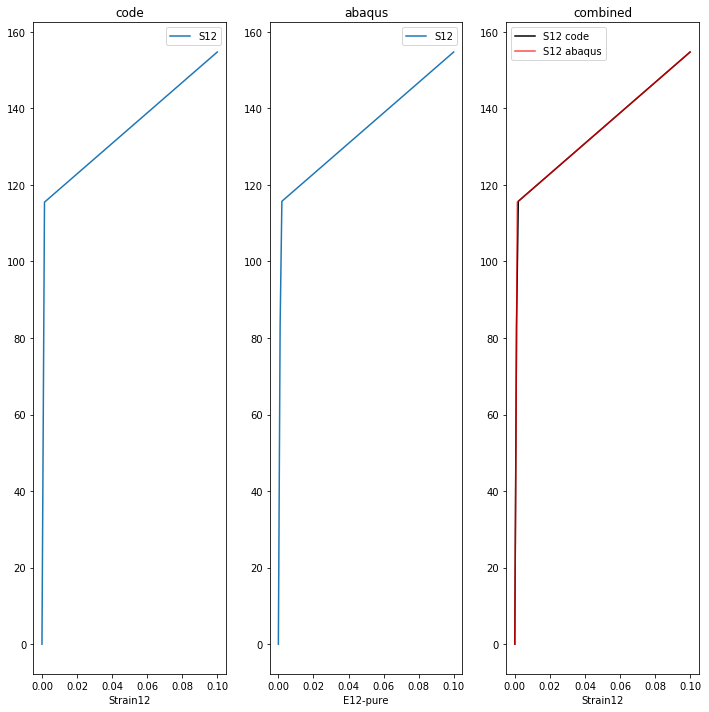

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

Stress_Strain_pure_shear_code.plot  (ax=ax[0]  , x='Strain12'  , y='Stress12'   , title ='code'    )
Stress_Strain_pure_shear_abaqus.plot(ax=ax[1]  , x='E12-pure'  , y='S12-pure'   , title ='abaqus'  )
Stress_Strain_pure_shear_abaqus.plot(ax=ax[2]  , x='E12-pure'  , y='S12-pure'   , title ='combined',alpha=1,color='black')
Stress_Strain_pure_shear_code.plot  (ax=ax[2]  , x='Strain12'  , y='Stress12'   , title ='combined',alpha=0.7, color='red')
ax[0].legend(['S12'])  
ax[1].legend(['S12'])
ax[2].legend(['S12 code','S12 abaqus'])

plt.tight_layout()

###  Code varefication attempt 4 using a single finite element in abaqus   <font color='black'></font> 
problem description:

1- A single quadratic element was chosen with a length and width of 1mm (so the corresponding --     
   displacement field is the same as the strain field)
   
2- The material parameters were chosen as follows  
   a- for the elastic zone -young's modulus = 200 Gpa -Poisson's ratio= 0.2
   
   b- for the plastic zone -the initial yeild stress = 200 Mpa and -the    
      Hardeing modulus =1200 Mpa which corresponds to the data point (370 
      yeild strerss 0.1417 plastic strain).
      
3- A symetric boundary condition was applied on the left and lower edge.

4- A prescribed total shear strain of 0.1 was done by setting the upper edge displacement boundary condition as
   (U1 =0.1) and a fixed boundary condition for the lower rdge.

###  after the analysis is complete a stress strain plot is generated (for the shear stress vs shear strain )
![title](Simple-shear-strain.jpg)
![title](Simple-shear-stress.jpg)

## Visualization

In [43]:
Stress_simple_shear_code          = pd.read_csv('stress_Pure_shear_U(0.1).csv')
Strain_simple_shear_code          = pd.read_csv('strain_Pure_shear_U(0.1).csv')
Stress_Strain_simple_shear_abaqus = pd.read_csv('../../abaqus/3-pure-shear-loading-plane-stress/Pure-simple-shear-data-output.csv',delimiter=";")
Stress_Strain_simple_shear_code   = pd.concat([Strain_pure_shear_code,Stress_pure_shear_code],axis=1)

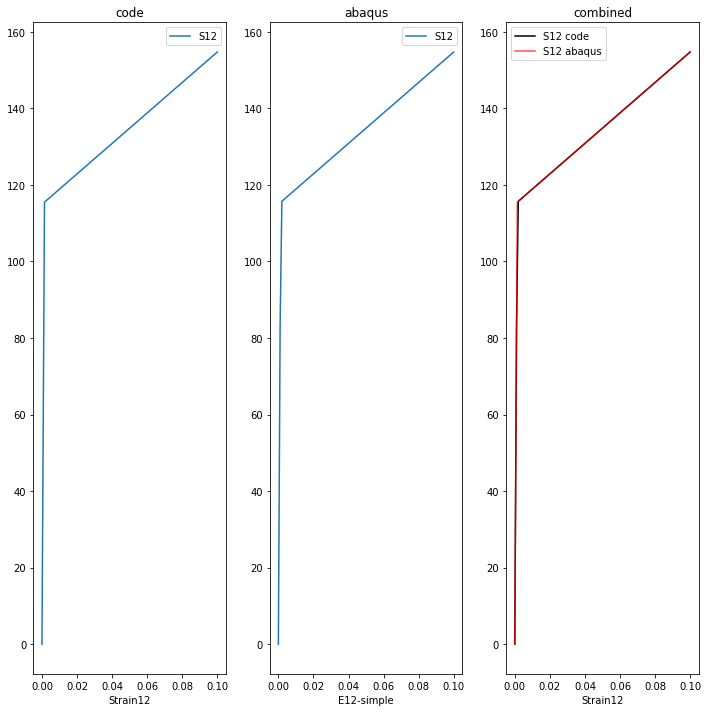

In [44]:
ig, ax = plt.subplots(1, 3, figsize=(10, 10))

Stress_Strain_simple_shear_code.plot  (ax=ax[0]  , x='Strain12'  , y='Stress12'   , title ='code'    )
Stress_Strain_simple_shear_abaqus.plot(ax=ax[1]  , x='E12-simple', y='S12-simple' , title ='abaqus'  )
Stress_Strain_simple_shear_abaqus.plot(ax=ax[2]  , x='E12-simple', y='S12-simple' , title ='combined',alpha=1,color='black')
Stress_Strain_simple_shear_code.plot  (ax=ax[2]  , x='Strain12'  , y='Stress12'   , title ='combined',alpha=0.7, color='red')
ax[0].legend(['S12'])  
ax[1].legend(['S12'])
ax[2].legend(['S12 code','S12 abaqus'])

plt.tight_layout()